# Lab 08 机器学习模型评估与性能分析

在这个实验室，我们将逐步通过一个简单的评估过程做评估，包括两个机器学习模型，Logistic回归和k-近邻。

首先，让我们导入必要的库。

In [1]:
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

现在我们需要一个数据集。本周我们将使用sci kit learn的乳腺癌数据集。

In [3]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['cancer_type'])

y.value_counts()

cancer_type
1              357
0              212
dtype: int64

我们可以看出，我们的数据集并不平衡。

### 划分数据

评估模型的首要任务是将数据分成训练集、验证集和测试集。

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

#### 选型

然后我们需要两个模型来评估。以K-最近邻（KNN）模型和Logistic回归模型为例。

In [5]:
log_reg = LogisticRegression(max_iter=5000)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)

### 定时性能

到目前为止，我们忽略的性能指标之一是计算性能。在时间紧迫的生产环境中，如自动驾驶车辆、无人机、生物医学设备等，我们需要在每个系统的时间限制内得到结果。因此，在为这类问题创建机器学习解决方案时，模型的计算性能对整个模型的性能起着巨大的作用。

We can use built-in [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) in Ipython environment to measure the computing performance. First let us measure the training time for both models.

我们可以使用内置的【magic commands】 在Ipython环境中测量计算性能。首先让我们来衡量两个模型的训练时间。

In [7]:
%%time
log_reg.fit(X_train, y_train.values.ravel())

CPU times: user 2.28 s, sys: 603 ms, total: 2.88 s
Wall time: 493 ms


LogisticRegression(max_iter=5000)

In [8]:
%%time
knn.fit(X_train, y_train.values.ravel())

CPU times: user 10.3 ms, sys: 2.69 ms, total: 13 ms
Wall time: 2.2 ms


KNeighborsClassifier()

Now let's measure the prediction time for each model.

现在让我们测量每个模型的预测时间。

In [9]:
%%time
pred_log_reg = log_reg.predict(X_val)

CPU times: user 8.11 ms, sys: 1.38 ms, total: 9.49 ms
Wall time: 1.59 ms


In [10]:
%%time
pred_knn = knn.predict(X_val)

CPU times: user 28.8 ms, sys: 21.6 ms, total: 50.4 ms
Wall time: 8.57 ms


从以上分析可以看出，kNN模型训练速度快，但预测速度慢。这是很直观的，当你认为kNN除了存储数据外，在训练阶段什么也不做。另一方面，Logistic回归模型在训练阶段速度较慢，但预测速度比kNN快得多。

### 预测性能

让我们用模型的预测性能来评估它们。首先，让我们为所有模型生成混淆矩阵和分类报告。

In [11]:
confusion_matrix(y_true=y_val, y_pred=pred_log_reg)

array([[37,  2],
       [ 1, 67]])

In [12]:
print(classification_report(y_true=y_val, y_pred=pred_log_reg))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        68

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [13]:
confusion_matrix(y_true=y_val, y_pred=pred_knn)

array([[37,  2],
       [ 1, 67]])

In [14]:
print(classification_report(y_true=y_val, y_pred=pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        68

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



在这一点上，我们现在可以看到logistic回归模型比K-最近邻模型表现得更好。

### ROC curve
### ROC曲线

当数据集不平衡时，比如我们的乳腺癌数据集，像准确度这样的指标并不能给你全面的表现。因此，我们需要更复杂的绩效衡量标准。

One of the most popular methods is the ROC curve. Let's plot both of our models' ROC curves. Sci-kit learn provides the method called *plot_roc_curve*. You can find more details on this method
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html). We can give our model, test datasets, and a name for the plot, and it will return a Display object that holds the plot data. You can use this object in future plots as well.

其中最流行的方法是ROC曲线。让我们绘制两个模型的ROC曲线。Sci-kit-learn提供了一种称为*plot_roc_curve*的方法。您可以找到有关此方法的更多详细信息【here】。我们可以给出模型、测试数据集和绘图的名称，它将返回一个保存绘图数据的显示对象。您也可以在以后的绘图中使用此对象。

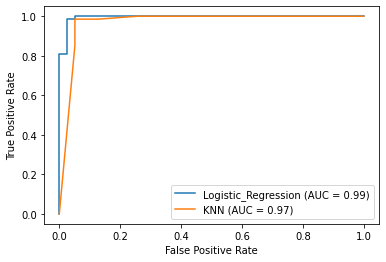

In [15]:
ax = plt.gca()
plot_log_reg = plot_roc_curve(estimator=log_reg, X=X_val, y=y_val, ax=ax, name='Logistic_Regression')
plot_knn = plot_roc_curve(estimator=knn, X=X_val, y=y_val, ax=ax, name='KNN')

从这些ROC曲线可以明显看出，Logistic回归模型的性能略优于k近邻模型。为了得到ROC曲线下更精确的面积，我们可以使用*ROC_auc_score*方法。但是我们必须输入我们预测的概率值。在Sci-kit-learn中的ML算法的标准实现中，您可以找到*predict_proba（）*函数调用，该函数将给出预测的概率。

In [16]:
pred_scores = log_reg.predict_proba(X_val)
print('Area under the curve for logistic regression model: {}'.format(roc_auc_score(y_true=y_val,
                                                                                    y_score=pred_scores[:, 1])))

Area under the curve for logistic regression model: 0.9947209653092006


In [17]:
pred_scores = knn.predict_proba(X_val)
print('Area under the curve for KNearestNeighbours model: {}'.format(roc_auc_score(y_true=y_val,
                                                                                   y_score=pred_scores[:, 1])))

Area under the curve for KNearestNeighbours model: 0.9685143288084465


### Cross-Validation
### 交叉验证


现在我们知道我们的Logistic回归模型对我们当前的培训和验证数据集更有效。
 
但这并不意味着这种情况会继续下去，如果我们用不同的样本训练同一个模型。为了了解我们的模型如何在不同的训练样本下工作，我们可以使用k-fold交叉验证。

尽管我们在这里使用交叉验证是为了达到上述目的，但在实际的机器学习中，我们使用交叉验证还有一个主要原因。也就是说，最大限度地利用数据。使用交叉验证，我们可以在培训和验证阶段使用所有数据。所以如果你的数据集很小，交叉验证是克服这个问题的最好方法。

我们在sklearn中使用*cross_val_score（）*方法从折叠运行中获得性能分数。让我们做一个利用logistic回归模型的所有训练和验证数据进行10倍交叉验证。这里我们使用宏观平均f1分数作为评分方法。

In [18]:
scores = cross_val_score(estimator=log_reg, X=X_train_val, y=y_train_val.values.ravel(), cv=10, scoring='f1_macro')

In [19]:
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.95 std: 0.05


Let's do the same for kNN model.

让我们对kNN模型做同样的处理。

In [20]:
scores = cross_val_score(estimator=knn, X=X_train_val, y=y_train_val.values.ravel(), cv=10, scoring='f1_macro')

In [21]:
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.92 std: 0.05


从这些结果，我们可以得出结论，我们的Logistic回归模型比kNN更好，无论样本。因此，我们可以得出结论，在这种情况下，Logistic回归是一个更好的可选择模型。

最后一步是根据测试数据集测试我们的模型。

In [22]:
pred = log_reg.predict(X_test)
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        59
           1       0.89      0.99      0.94        84

    accuracy                           0.92       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.92      0.92       143



## Task
Use the dataset you cleaned in lab02 and lab03.

* Make 3 different models using different machine learning algorithms.
* Identify which performance measures you use by analyzing the problem.
* Do hyperparameter tuning using *cross_val_score()* for every model and find the best parameters for each.
* Do a complete performance analysis using the techniques you learned in class, and find the best model.
* Run the model on the test dataset, and get the required performance numbers.

## 任务
使用在lab02和lab03中清理的数据集。
* 使用不同的机器学习算法制作3个不同的模型。
* 通过分析问题来确定您使用的性能度量。
* 使用*cross_val_score（）*对每个模型进行超参数调整，并为每个模型找到最佳参数。
* 用你在课堂上学到的技巧做一个完整的性能分析，找到最好的模型。
* 在测试数据集上运行模型，并获得所需的性能数字。

## 任务 - 三个算法模型评估

### 1、读入数据
### 2、划分数据
### 3、选型
- 1）定时性能
- 2）预测性能
- 3）ROC曲线
- 4）交叉验证

- 算法1：决策树算法
- 算法2：KNN
- 算法3：逻辑回归

### 1、读入数据

In [23]:
bands_df = pd.read_csv('lab02_bands.csv')
encode = {
    'grain screened':{'yes':0,'no':1},
    'blade mfg':{'uddeholm':0,'benton':1},
    'paper type':{'coated':0,'uncoated':1,'super':2},
    'ink type':{'coated':0,'uncoated':1,'cover':2}, 
    'direct steam':{'yes':0,'no':1},
    'solvent type':{'naptha':0,'line':1,'xylol':2},
    'press type':{'motter70':0,'motter94':1,'albert70':2,'woodhoe70':3},
}
bands_df.replace(encode, inplace=True)
bands_df

,Unnamed: 0,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,0,19910108,x126,tvguide,25503,0,key,yes,1,gallatin,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,1
1,1,19910109,x266,tvguide,25503,0,key,yes,1,gallatin,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,0
2,2,19910104,b7,modmat,47201,0,key,yes,1,gallatin,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,0
3,3,19910104,t133,massey,39039,0,key,yes,1,gallatin,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,0
4,4,19910111,j34,kmart,37351,1,key,yes,1,gallatin,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,19941005,aa66,kmart,85813,1,key,yes,1,gallatin,...,41.2,0.0,0.0,1.0,1.0,30.0,40.0,112.50,100.0,1
536,536,19941009,j44,best,38064,1,key,yes,1,gallatin,...,41.2,0.0,0.0,0.0,0.0,30.0,40.0,110.00,100.0,1
537,537,19941009,aa58,kmart,85814,1,key,yes,1,gallatin,...,41.2,0.0,0.0,2.7,2.8,30.0,40.0,108.00,100.0,1
538,538,19941010,aa70,kmart,85814,1,key,yes,1,gallatin,...,41.2,0.0,0.0,1.5,2.3,30.0,40.0,108.00,100.0,1


### 2、划分数据

In [24]:
y = bands_df['band type']
X = bands_df.drop(['band type', 'Unnamed: 0'], axis=1)

# X.info()

In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)
# X_train.info()

In [26]:
objectFeatureNames = ['grain screened','blade mfg','direct steam','paper type', 'ink type','press type','solvent type']
objectX_train = pd.DataFrame(X_train, columns = objectFeatureNames)
objectX_val = pd.DataFrame(X_val, columns = objectFeatureNames)
# objectX.info()

In [27]:
floatFeatureNames = ["press speed","roller durometer","ink pct","current density","humifity","varnish pct","solvent pct"]
floatX_train = pd.DataFrame(X_train, columns = floatFeatureNames)
floatX_val = pd.DataFrame(X_val, columns = floatFeatureNames)
# floatX.info()

### 3、选型

In [28]:
tree = DecisionTreeClassifier(criterion='entropy')

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
log_reg = LogisticRegression(max_iter=5000)

#### 1）定时性能

##### ① 训练时间

In [32]:
%%time
tree.fit(objectX_train, y_train)

CPU times: user 3.11 ms, sys: 813 µs, total: 3.92 ms
Wall time: 3.38 ms


DecisionTreeClassifier(criterion='entropy')

In [33]:
%%time
knn.fit(floatX_train, y_train)

CPU times: user 2.24 ms, sys: 500 µs, total: 2.74 ms
Wall time: 2.26 ms


KNeighborsClassifier()

In [34]:
%%time
log_reg.fit(floatX_train, y_train)

CPU times: user 21.6 ms, sys: 2.58 ms, total: 24.2 ms
Wall time: 22.5 ms


LogisticRegression(max_iter=5000)

##### ② 预测时间

In [35]:
%%time
pred_tree = tree.predict(objectX_val)
# print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

CPU times: user 2.15 ms, sys: 86 µs, total: 2.24 ms
Wall time: 2.2 ms


In [36]:
%%time
pred_knn = knn.predict(floatX_val)

CPU times: user 7.65 ms, sys: 2.92 ms, total: 10.6 ms
Wall time: 7.9 ms


In [37]:
%%time
pred_log_reg = log_reg.predict(floatX_val)

CPU times: user 1.69 ms, sys: 21 µs, total: 1.71 ms
Wall time: 1.7 ms


总结：

训练时间：knn < 决策树 < 逻辑回归

预测时间：逻辑回归 < 决策树 < knn

#### 2）预测性能

先生成混淆矩阵和分类报告。

In [38]:
confusion_matrix(y_true=y_val, y_pred=pred_tree)
print(classification_report(y_true=y_val, y_pred=pred_tree))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        59
           1       0.41      0.39      0.40        36

    accuracy                           0.56        95
   macro avg       0.53      0.52      0.53        95
weighted avg       0.55      0.56      0.56        95



In [39]:
confusion_matrix(y_true=y_val, y_pred=pred_knn)
print(classification_report(y_true=y_val, y_pred=pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        59
           1       0.45      0.50      0.47        36

    accuracy                           0.58        95
   macro avg       0.56      0.56      0.56        95
weighted avg       0.59      0.58      0.58        95



In [40]:
confusion_matrix(y_true=y_val, y_pred=pred_log_reg)
print(classification_report(y_true=y_val, y_pred=pred_log_reg))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        59
           1       0.63      0.47      0.54        36

    accuracy                           0.69        95
   macro avg       0.68      0.65      0.66        95
weighted avg       0.69      0.69      0.68        95



总结:

预测性能：

决策树 > knn > 逻辑回归

#### 3）ROC 曲线

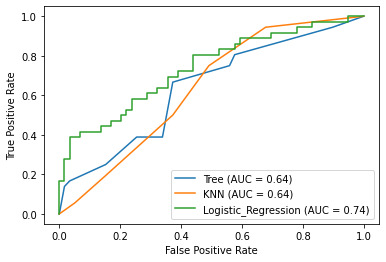

In [41]:
ax = plt.gca()
plot_tree = plot_roc_curve(estimator=tree, X=objectX_val, y=y_val, ax=ax, name='Tree')
plot_knn = plot_roc_curve(estimator=knn, X=floatX_val, y=y_val, ax=ax, name='KNN')
plot_log_reg = plot_roc_curve(estimator=log_reg, X=floatX_val, y=y_val, ax=ax, name='Logistic_Regression')


In [42]:
pred_scores = tree.predict_proba(objectX_val)
print('Area under the curve for 【tree】 regression model: {}'.format(roc_auc_score(y_true=y_val,
                                                                                    y_score=pred_scores[:, 1])))

Area under the curve for 【tree】 regression model: 0.6377118644067796


In [43]:
pred_scores = knn.predict_proba(floatX_val)
print('Area under the curve for 【knn】 regression model: {}'.format(roc_auc_score(y_true=y_val,
                                                                                    y_score=pred_scores[:, 1])))

Area under the curve for 【knn】 regression model: 0.6358286252354048


In [44]:
pred_scores = log_reg.predict_proba(floatX_val)
print('Area under the curve for 【logistic】 regression model: {}'.format(roc_auc_score(y_true=y_val,
                                                                                    y_score=pred_scores[:, 1])))

Area under the curve for 【logistic】 regression model: 0.7372881355932203


#### 4）交叉验证

In [45]:
objectX_train_val = pd.DataFrame(X_train_val, columns = objectFeatureNames)
scores = cross_val_score(estimator=tree, X=objectX_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))


F1_score: 0.65 std: 0.08


In [46]:
floatX_train_val = pd.DataFrame(X_train_val, columns = floatFeatureNames)
scores = cross_val_score(estimator=knn, X=floatX_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))


F1_score: 0.63 std: 0.09


In [47]:
scores = cross_val_score(estimator=log_reg, X=floatX_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))


F1_score: 0.60 std: 0.09


结论：
决策树模型 > knn模型 > 逻辑回归模型

In [48]:
objectX_val = pd.DataFrame(X_test, columns = objectFeatureNames)
pred = tree.predict(objectX_val)
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        85
           1       0.69      0.66      0.68        77

    accuracy                           0.70       162
   macro avg       0.70      0.70      0.70       162
weighted avg       0.70      0.70      0.70       162

